To break it down, earlier programmers used to explicitly code what the machine should do. Take the example of a car with power steering. If the driver turns the steering wheel to the right, there is a program which tells the car to move the wheels to the right. This will make the car turn right.

And what happens when we add machine learning to it?

We can essentially fit the car with a camera, and some proximity sensors which will help the program “see” what is in front of the car. And we will teach the machine to check if there is any obstacle in front of the car, and if not, then move forward.

This is obviously an over-simplification, but this is one of the first principles when it comes to making a “driverless” car.  And companies like Tesla, Ford, and BMW, are using machine learning and AI to do all of these tasks.

# What is a classification algorithm in machine learning?


Humans are essentially beings who like to classify things.  In fact, it is one of the ways we learn to identify things.

Imagine a baby who is trying to understand the world he is seeing.

He sees his parents, who have two hands and two legs.
But once when he was in a garden, he also noticed a creature which had four legs and a tail.
The baby’s mom said that the creature was a dog.
Then the baby’s father shows a picture of a cat and said this is a different creature.
Now the baby can identify humans, cats and dogs.

# Types of classification algorithms in machine learning according to classification tasks

**Multi-class classification

As the name implies you have more than two types of classes in this type of classification task. For example, the model would have to classify as buy, hold, and sell.

**Imbalance classification

If you are given data where the data for one class is a majority, then it is a type of imbalance classification task. For example, if the data of S&P500 is taken and the task is to predict whether we should hold it for a year, or not, we will find that since the S&P500 increases every year, the model would always say hold it for a year.

In [1]:
# Machine learning classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# For data manipulation
import pandas as pd
# To plot
import matplotlib.pyplot as plt
import seaborn

In [2]:
!pip install yfinance



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed


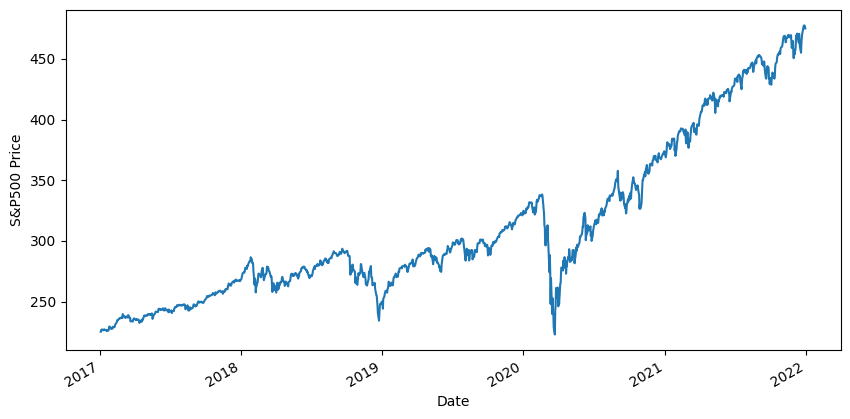

In [3]:
# Step 2: Fetch data
import yfinance as yf
Df = yf.download('SPY', start="2017-01-01", end="2022-01-01")
Df = Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

# Logistic Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,average_precision_score

In [5]:
data=pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

In [6]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [7]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[5 rows x 24 columns]

In [8]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
data.describe().T

count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189   2.887016    0.0     1.0     5.0   
Cloud3pm        85099.0     4.503167   2.720633    0.0     2.0     5.0   
Temp9am        141289.0    16.987509   6.492838   -7.2    12.3    16.7   
Temp3pm        139467.0    21.687235   6.937594   -5.4    16.6    21.1   
RISK_MM        142193.0     2.360682   8.477969    0.0     0.0     0.0   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7  
RISK_MM           0.8   371.0

In [11]:
#find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 7 categorical variables : 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# view the categorical variables
data[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

In [13]:
# check and print categorical variables containing missing values

nullCategorical = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[nullCategorical].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [14]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 17 numerical variables : 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [15]:
# view the numerical variables
data[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1007.1       8.0       NaN     16.9     21.8      0.0  
1       1007.8       NaN       NaN     17.2     24.3      0.0  
2       1008.7       NaN       2.0     21.0     23.2      0.0  
3       1012.8       NaN       NaN     18.1     26.5      1.0  
4       1006.0       7.0       8.0     17.8     29.7      0.2

In [16]:
# check missing values in numerical variables
data[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
dtype: int64

In [17]:
# view summary statistics in numerical variables to check for outliers
print(round(data[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

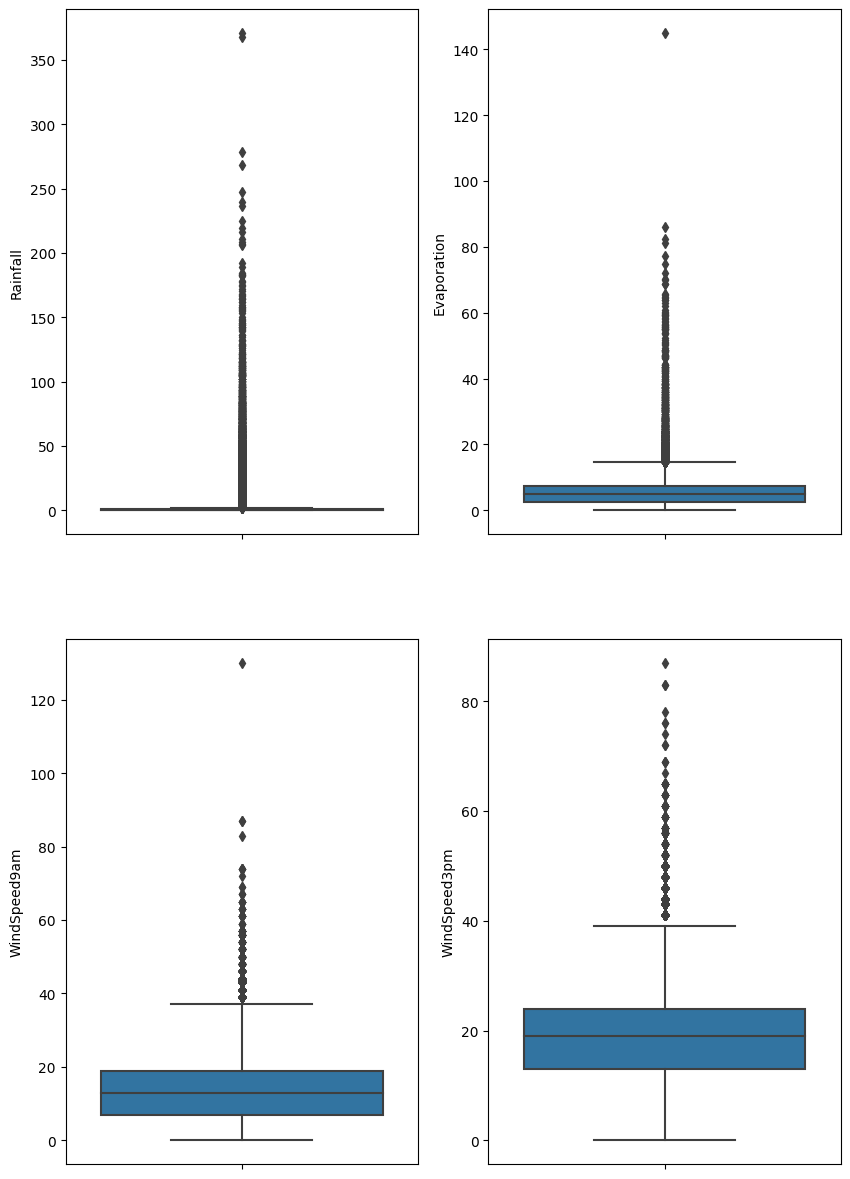

In [18]:
# plot box plot to check outliers
plt.figure(figsize=(10,15))

plt.subplot(2, 2, 1)
fig = sns.boxplot(y=data['Rainfall'])
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = sns.boxplot(y=data["Evaporation"])
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = sns.boxplot(y=data['WindSpeed9am'])
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = sns.boxplot(y=data['WindSpeed3pm'])
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

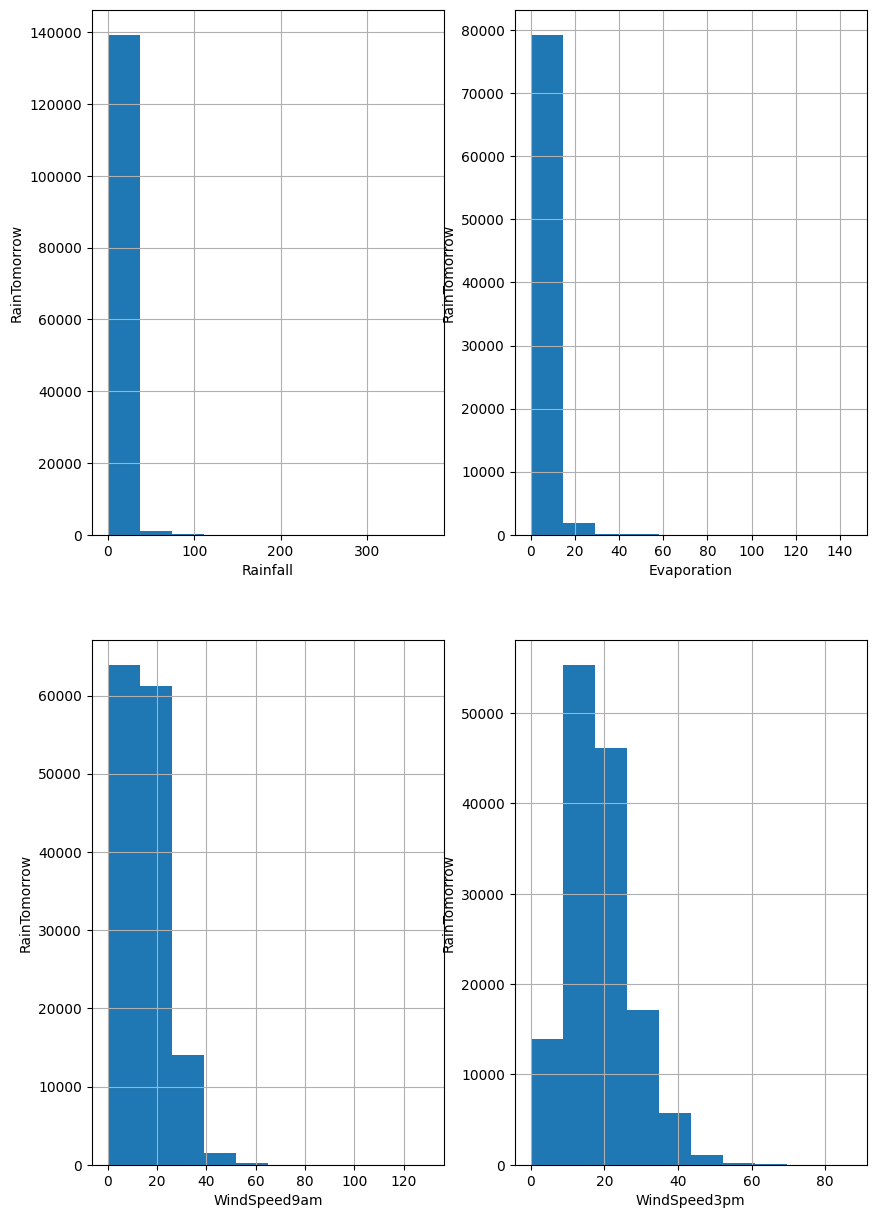

In [19]:
# plot histogram to check distribution
plt.figure(figsize=(10,15))

plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [20]:


IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Rainfall_Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Rainfall_Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Rainfall_Lower_fence, upperboundary=Rainfall_Upper_fence))

Outliers are values < -2.4000000000000004 or > 3.2


In [21]:
nullValues = [var for var in data.columns if data[var].isnull().sum()!=0]
print(data[nullValues].isnull().sum())

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64


In [22]:
print(x_train.head())

NameError: name 'x_train' is not defined

In [ ]:
print(x_test.head())

In [ ]:
categorical = [var for var in nullValues if data[var].dtype=='O']

In [23]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('weatherAUS.csv')

# Explore the data
print(data.head())
print(data.info())

# Handle missing data
categorical = [var for var in data.columns if data[var].dtype == 'O']
numerical = [var for var in data.columns if data[var].dtype != 'O']

# Impute missing categorical data
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='constant')
data[categorical] = categorical_imputer.fit_transform(data[categorical])

# Impute missing numerical data
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical] = numerical_imputer.fit_transform(data[numerical])

# Encode categorical variables
x = pd.get_dummies(data.drop(['RainTomorrow'], axis=1))
y = pd.get_dummies(data['RainTomorrow'], drop_first=True)

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(x_train, y_train)

# Evaluate the model
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9999062309531623


# Naive Bayes Classifier

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dataset=pd.read_csv('emails.csv')
dataset

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]

In [27]:
dataset.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [28]:
dataset.tail(10)

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
5162  Email 5163    2   3    1    2    1   2   32    0    0  ...         0   
5163  Email 5164    0   0    1    0    0   0    1    0    0  ...         0   
5164  Email 5165   21  18    3    1    6   4  106    1    2  ...         0   
5165  Email 5166    1   0    1    0    3   1   12    1    0  ...         0   
5166  Email 5167    1   0    1    1    0   0    4    0    0  ...         0   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
5162    0       0    0               0         0         0   0    0   
5163    0       0    0               0         0         0   0    0   
5164    0       0    0               0         0         0   0    0   
5165    0       0    1               0         0         0   0    0   
5166    0       0    0               0         0         0   0    0   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
5162           1  
5163           1  
5164           0  
5165           0  
5166           1  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[10 rows x 3002 columns]

In [29]:
dataset.describe().T

count      mean        std  min  25%  50%  75%    max
the         5172.0  6.640565  11.745009  0.0  0.0  3.0  8.0  210.0
to          5172.0  6.188128   9.534576  0.0  1.0  3.0  7.0  132.0
ect         5172.0  5.143852  14.101142  1.0  1.0  1.0  4.0  344.0
and         5172.0  3.075599   6.045970  0.0  0.0  1.0  3.0   89.0
for         5172.0  3.124710   4.680522  0.0  1.0  2.0  4.0   47.0
...            ...       ...        ...  ...  ...  ...  ...    ...
military    5172.0  0.006574   0.138908  0.0  0.0  0.0  0.0    4.0
allowing    5172.0  0.004060   0.072145  0.0  0.0  0.0  0.0    3.0
ff          5172.0  0.914733   2.780203  0.0  0.0  0.0  1.0  114.0
dry         5172.0  0.006961   0.098086  0.0  0.0  0.0  0.0    4.0
Prediction  5172.0  0.290023   0.453817  0.0  0.0  0.0  1.0    1.0

[3001 rows x 8 columns]

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [31]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

Empty DataFrame
Columns: [Email No., the, to, ect, and, for, of, a, you, hou, in, on, is, this, enron, i, be, that, will, have, with, your, at, we, s, are, it, by, com, as, from, gas, or, not, me, deal, if, meter, hpl, please, re, e, any, our, corp, can, d, all, has, was, know, need, an, forwarded, new, t, may, up, j, mmbtu, should, do, am, get, out, see, no, there, price, daren, but, been, company, l, these, let, so, would, m, into, xls, farmer, attached, us, information, they, message, day, time, my, one, what, only, http, th, volume, mail, contract, which, month, ...]
Index: []

[0 rows x 3002 columns]

In [32]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [33]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 1 categorical variables : 
 ['Email No.']


In [34]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
dataset['Email No.']= LabelEncoder().fit_transform(dataset['Email No.'])
dataset.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0          0    0   0    1    0    0   0    2    0    0  ...         0    0   
1       1111    8  13   24    6    6   2  102    1   27  ...         0    0   
2       2222    0   0    1    0    0   0    8    0    0  ...         0    0   
3       3333    0   5   22    0    5   1   51    2   10  ...         0    0   
4       4444    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [35]:
y = dataset['Prediction']
x = dataset.drop(['Prediction'], axis=1)

In [36]:
print(x.head())

   Email No.  the  to  ect  and  for  of    a  you  hou  ...  enhancements  \
0          0    0   0    1    0    0   0    2    0    0  ...             0   
1       1111    8  13   24    6    6   2  102    1   27  ...             0   
2       2222    0   0    1    0    0   0    8    0    0  ...             0   
3       3333    0   5   22    0    5   1   51    2   10  ...             0   
4       4444    7   6   17    1    5   2   57    0    9  ...             0   

   connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0         0    0       0    0               0         0         0   0    0  
1         0    0       0    0               0         0         0   1    0  
2         0    0       0    0               0         0         0   0    0  
3         0    0       0    0               0         0         0   0    0  
4         0    0       0    0               0         0         0   1    0  

[5 rows x 3001 columns]


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [38]:
x_train.head()

Email No.  the  to  ect  and  for  of   a  you  hou  ...  enhancements  \
1023         29    7   4    2    2    2   1  48    1    0  ...             0   
4587       3987    0   0    1    0    1   0   3    0    0  ...             0   
4415       3797    9   5    2    3    2   6  85    1    1  ...             0   
4863       4294    2   6    1    4    1   1  52    4    0  ...             0   
4901       4337    3   3    3    3    2   1  47    3    0  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
1023         0    0       0    0               0         0         0   0    0  
4587         0    0       0    0               0         0         0   0    0  
4415         0    0       0    0               0         0         0   2    0  
4863         0    0       0    0               0         0         0   3    0  
4901         0    0       0    0               0         0         0   0    0  

[5 rows x 3001 columns]

In [39]:
x_test.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  enhancements  \
1566        631    1   1    1    0    1   0    5    0    0  ...             0   
1988       1099   13  20   66    8   10   0  195    4   33  ...             0   
1235        264    1  14    3    6    2   2  238    0    0  ...             0   
3276       2531    0   0    1    0    1   0    4    0    0  ...             0   
3438       2711   11   6    2    1    5   6   93    3    1  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
1566         0    0       0    0               0         0         0   0    0  
1988         0    0       0    0               0         0         0   0    0  
1235         0    1       0    1               0         0         0   5    0  
3276         0    0       0    0               0         0         0   0    0  
3438         0    0       0    0               0         0         0   4    0  

[5 rows x 3001 columns]

In [40]:
y_train[:10]

C:\Users\RESHMA R B\AppData\Local\Temp\ipykernel_25308\891270224.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


1023    0
4587    0
4415    0
4863    1
4901    0
1569    0
2210    1
809     1
4775    0
978     0
Name: Prediction, dtype: int64

In [41]:
y_test[:10]

C:\Users\RESHMA R B\AppData\Local\Temp\ipykernel_25308\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


1566    0
1988    0
1235    1
3276    0
3438    0
1471    0
1129    1
3750    0
3049    0
530     0
Name: Prediction, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data 
x_test=scaler.transform(x_test)

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()  
classifier.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1012   85]
 [  23  432]]


In [46]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1097
           1       0.84      0.95      0.89       455

    accuracy                           0.93      1552
   macro avg       0.91      0.94      0.92      1552
weighted avg       0.94      0.93      0.93      1552



In [47]:
accuracy_score(y_test,y_pred)

0.9304123711340206

In [48]:
average_precision= average_precision_score(y_test,y_pred)
print(average_precision)

0.8081709171504082


In [49]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


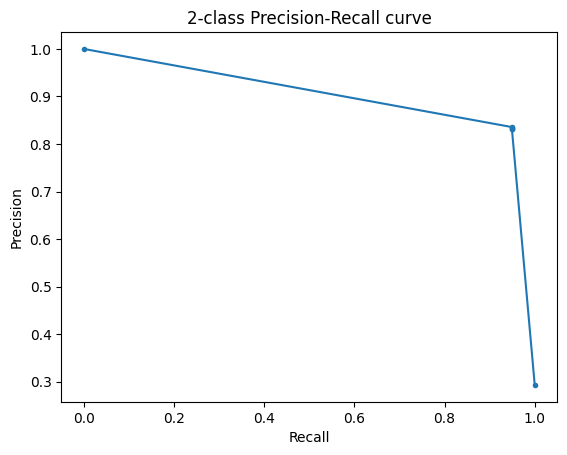

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute probability estimates for the positive class
y_scores = classifier.predict_proba(x_test)[:, 1]

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.title('2-class Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# K-Nearest Neighbors

In [51]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [52]:
dataset=pd.read_csv('emails.csv') 
dataset.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [53]:
dataset.describe()

the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  ...   
mean      2.627030    55.517401     2.466551     2.024362    10.600155  ...   
std       6.229845    87.574172     4.314444     6.967878    19.281892  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000    12.000000     0.000000     0.000000     1.000000  ...   
50%       1.000000    28.000000     1.000000     0.000000     5.000000  ...   
75%       2.000000    62.250000     3.000000     1.000000    12.000000  ...   
max      77.000000  1898.000000    70.000000   167.000000   223.000000  ...   

          connevey          jay       valued          lay  infrastructure  \
count  5172.000000  5172.000000  5172.000000  5172.000000     5172.000000   
mean      0.005027     0.012568     0.010634     0.098028        0.004254   
std       0.105788     0.199682     0.116693     0.569532        0.096252   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000     0.000000        0.000000   
75%       0.000000     0.000000     0.000000     0.000000        0.000000   
max       4.000000     7.000000     2.000000    12.000000        3.000000   

          military     allowing           ff          dry   Prediction  
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  
mean      0.006574     0.004060     0.914733     0.006961     0.290023  
std       0.138908     0.072145     2.780203     0.098086     0.453817  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     1.000000     0.000000     1.000000  
max       4.000000     3.000000   114.000000     4.000000     1.000000  

[8 rows x 3001 columns]

In [54]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

Empty DataFrame
Columns: [Email No., the, to, ect, and, for, of, a, you, hou, in, on, is, this, enron, i, be, that, will, have, with, your, at, we, s, are, it, by, com, as, from, gas, or, not, me, deal, if, meter, hpl, please, re, e, any, our, corp, can, d, all, has, was, know, need, an, forwarded, new, t, may, up, j, mmbtu, should, do, am, get, out, see, no, there, price, daren, but, been, company, l, these, let, so, would, m, into, xls, farmer, attached, us, information, they, message, day, time, my, one, what, only, http, th, volume, mail, contract, which, month, ...]
Index: []

[0 rows x 3002 columns]

In [55]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 1 categorical variables : 
 ['Email No.']


In [56]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Email No.  contains  5172  labels


In [57]:
# view summary statistics in numerical variables to check for outliers
print(round(dataset[numerical].describe()),2)

          the      to     ect     and     for      of       a     you     hou  \
count  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0   
mean      7.0     6.0     5.0     3.0     3.0     3.0    56.0     2.0     2.0   
std      12.0    10.0    14.0     6.0     5.0     6.0    88.0     4.0     7.0   
min       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     1.0     1.0     0.0     1.0     0.0    12.0     0.0     0.0   
50%       3.0     3.0     1.0     1.0     2.0     1.0    28.0     1.0     0.0   
75%       8.0     7.0     4.0     3.0     4.0     2.0    62.0     3.0     1.0   
max     210.0   132.0   344.0    89.0    47.0    77.0  1898.0    70.0   167.0   

           in  ...  connevey     jay  valued     lay  infrastructure  \
count  5172.0  ...    5172.0  5172.0  5172.0  5172.0          5172.0   
mean     11.0  ...       0.0     0.0     0.0     0.0             0.0   
std      19.0  ...       0.0     0.0     0.0     1.0  

In [58]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
dataset['Email No.']= LabelEncoder().fit_transform(dataset['Email No.'])
dataset.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0          0    0   0    1    0    0   0    2    0    0  ...         0    0   
1       1111    8  13   24    6    6   2  102    1   27  ...         0    0   
2       2222    0   0    1    0    0   0    8    0    0  ...         0    0   
3       3333    0   5   22    0    5   1   51    2   10  ...         0    0   
4       4444    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [59]:
y = dataset['Prediction']
x = dataset.drop(['Prediction'], axis=1)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data 
x_test=scaler.transform(x_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') # by default n_neighbors = 5
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [63]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[997 114]
 [ 65 376]]


In [65]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1111
           1       0.77      0.85      0.81       441

    accuracy                           0.88      1552
   macro avg       0.85      0.87      0.86      1552
weighted avg       0.89      0.88      0.89      1552



In [66]:
accuracy_score(y_pred,y_test)

0.8846649484536082

In [67]:
average_precision= average_precision_score(y_test,y_pred)
print(average_precision)

0.6961273593524653


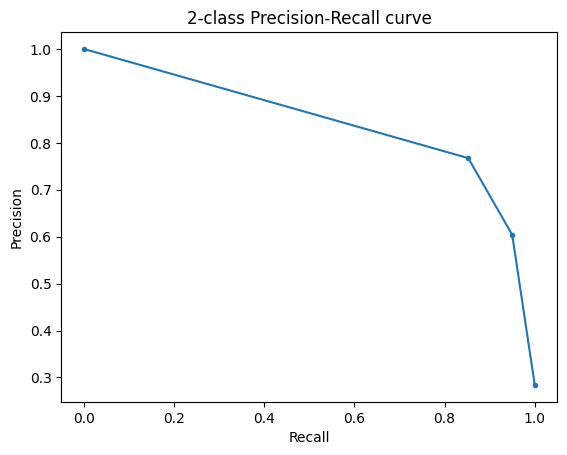

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute probability estimates for the positive class
y_scores = classifier.predict_proba(x_test)[:, 1]

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.title('2-class Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [70]:
from sklearn.linear_model import LassoCV

# Lasso for feature selection
lasso = LassoCV()
lasso.fit(x, y)

print("Selected Features: ", x.columns[(lasso.coef_ != 0)])


C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1776240463409522, tolerance: 0.08544321972443775
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3309768417379928, tolerance: 0.08544321972443775
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7994626688627022, tolerance: 0.08544321972443775
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_mod

C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4426136592169314, tolerance: 0.08577524776408035
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8249159424641448, tolerance: 0.08577524776408035
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2417028198906337, tolerance: 0.08577524776408035
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_mod

C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7286220526578973, tolerance: 0.08545171580473701
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2754344662254198, tolerance: 0.08545171580473701
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8213876516406344, tolerance: 0.08545171580473701
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_mod

C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.400752174654599, tolerance: 0.08460782986950206
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19344112076748843, tolerance: 0.08460782986950206
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26508819136665807, tolerance: 0.08460782986950206
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_mo

Selected Features:  Index(['Email No.', 'the', 'to', 'for', 'of', 'a', 'you', 'in', 'on', 'enron',
       'i', 'will', 'have', 'at', 's', 'it', 'as', 'or', 'me', 'deal', 'if',
       'hpl', 'please', 're', 'e', 'our', 'd', 'an', 't', 'j', 'do', 'am',
       'get', 'l', 'let', 'm', 'xls', 'attached', 'one', 'only', 'http', 'th',
       'nom', 'pec', 'here', 'b', 'net', 'p', 'o', 'c', 'he', 'list', 'r', 'w',
       'x', 'k', 'f', 'h', 'u', 'tu', 'her', 'na', 'g', 'id', 'v', 'nd', 'st',
       'xp', 'thank', 'ali', 'al', 'rc', 'wi', 'age', 'est', 'sa', 'ca', 'dr',
       'z', 'rev', 'rm', 'cal', 'mo', 'tri', 'ce', 'da', 'ti', 'pa', 'ls',
       'ii', 'un', 'ct', 'ut', 'mi', 'po', 'sp', 'le', 'aren'],
      dtype='object')


C:\Users\RESHMA R B\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.031e+01, tolerance: 1.065e-01
  model = cd_fast.enet_coordinate_descent(


In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
df = pd.read_csv('Titanic.csv')

# Handling missing values in 'PClass' and 'Age'
df['PClass'] = df['PClass'].fillna(df['PClass'].mode()[0])  # Filling with mode
df['Age'] = df['Age'].fillna(df['Age'].median())  # Filling with median

# Ensure 'Sex' is encoded correctly
if df['Sex'].dtype == 'object':
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Encoding categorical variable 'PClass' into numerical values
df['PClass'] = LabelEncoder().fit_transform(df['PClass'])

# Features and target
X = df[['PClass', 'Age', 'Sex']]
y = df['Survived']

# Applying Chi-Square
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

print("Selected features (Chi-Square):")
print(X_kbest)


Selected features (Chi-Square):
[[0. 0.]
 [0. 0.]
 [0. 1.]
 ...
 [2. 1.]
 [2. 1.]
 [2. 1.]]


In [6]:
# Get the indices of the selected features
selected_features_indices = chi2_selector.get_support(indices=True)
print("Selected feature names:")
print(X.columns[selected_features_indices])


Selected feature names:
Index(['PClass', 'Sex'], dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

# Sample data
color = ['red', 'green', 'blue', 'green', 'red']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform
color_encoded = le.fit_transform(color)
print(color_encoded)


[2 1 0 1 2]


In [8]:
import pandas as pd

# Sample data
color = ['red', 'green', 'blue', 'green', 'red']

# Create DataFrame
df = pd.DataFrame({'color': color})

# Apply One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['color'])
print(one_hot_encoded)


   blue  green  red
0     0      0    1
1     0      1    0
2     1      0    0
3     0      1    0
4     0      0    1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   int32  
 2   Age       1313 non-null   float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 46.3+ KB


In [11]:
import pandas as pd
import numpy as np

# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print the correlation of features with the target variable
print(correlation_matrix['Survived'].sort_values(ascending=False))


Survived    1.000000
Age        -0.061254
Name: Survived, dtype: float64


C:\Users\RESHMA R B\AppData\Local\Temp\ipykernel_15144\3668773795.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Load Titanic dataset
df = pd.read_csv('Titanic.csv')

# Feature and target variables
X = df[['PClass', 'Age', 'Sex']]
y = df['Survived']

# Convert categorical feature 'Sex' to numerical
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Apply SelectKBest
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

# Get scores
scores = selector.scores_
print("Filter Method Scores:", scores)


C:\Users\RESHMA R B\AppData\Local\Temp\ipykernel_15144\4078070816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


ValueError: could not convert string to float: '1st'